In [1]:
import os
import openpyxl

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

from glob import glob
from math import ceil, floor
from pathlib import Path


from utility import evaluation, plot_yx_line

In [2]:
text_in_title_para = {'fontfamily': 'sans-serif', 'fontsize': 12, 'fontweight': 20}
text_in_figure_para = {'fontfamily': 'sans-serif', 'fontsize': 8, 'fontweight': 20, 'horizontalalignment': 'left', 'verticalalignment': 'center'}

In [3]:
excel_filename = 'all_tree_trait.xlsx'
data_folder = Path(r'D:\Code\Apple_Crop_Potential_Prediction\data')
characterization_filepath = data_folder / excel_filename
print(characterization_filepath)

D:\Code\Apple_Crop_Potential_Prediction\data\all_tree_trait.xlsx


In [4]:
measurement_df = pd.read_excel(characterization_filepath, sheet_name='All')
measurement_df

,Filename,Tree Height,Trunk Length,Trunk Radius,Branch Recall,Manual Tree Height inch,Manual Tree Height,Diameter1/mm,Diameter2/mm,Diameter,Row,Diameter Difference,Difference > 8
0,tree1,3.185,3.291,0.029,45.0,141,358.14,62,58,60.0,13,2.0,False
1,tree2,2.892,2.969,0.027,33.0,137,347.98,59,51,55.0,13,1.0,False
2,tree3,2.616,2.745,0.023,33.0,127,322.58,49,49,49.0,13,3.0,False
3,tree4,3.189,3.248,0.028,41.0,149,378.46,63,56,59.5,13,3.5,False
4,tree5,2.796,2.857,0.022,28.0,133,337.82,43,49,46.0,13,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,tree37,2.664,3.536,0.027,23.0,125,317.50,49,51,50.0,15,4.0,False
80,tree38,2.331,3.305,0.022,19.0,114,289.56,45,48,46.5,15,2.5,False
81,tree39,2.555,3.351,0.024,23.0,122,309.88,47,47,47.0,15,1.0,False
82,tree40,2.809,3.532,0.017,25.0,132,335.28,53,49,51.0,15,17.0,True


In [5]:
measurement_df['Tree Height Comp'] = measurement_df['Tree Height'] * 1e2 + 60
measurement_df['Trunk Diameter'] = measurement_df['Trunk Radius'] * 1e3 * 2
measurement_df

,Filename,Tree Height,Trunk Length,Trunk Radius,Branch Recall,Manual Tree Height inch,Manual Tree Height,Diameter1/mm,Diameter2/mm,Diameter,Row,Diameter Difference,Difference > 8,Tree Height Comp,Trunk Diameter
0,tree1,3.185,3.291,0.029,45.0,141,358.14,62,58,60.0,13,2.0,False,378.5,58.0
1,tree2,2.892,2.969,0.027,33.0,137,347.98,59,51,55.0,13,1.0,False,349.2,54.0
2,tree3,2.616,2.745,0.023,33.0,127,322.58,49,49,49.0,13,3.0,False,321.6,46.0
3,tree4,3.189,3.248,0.028,41.0,149,378.46,63,56,59.5,13,3.5,False,378.9,56.0
4,tree5,2.796,2.857,0.022,28.0,133,337.82,43,49,46.0,13,2.0,False,339.6,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,tree37,2.664,3.536,0.027,23.0,125,317.50,49,51,50.0,15,4.0,False,326.4,54.0
80,tree38,2.331,3.305,0.022,19.0,114,289.56,45,48,46.5,15,2.5,False,293.1,44.0
81,tree39,2.555,3.351,0.024,23.0,122,309.88,47,47,47.0,15,1.0,False,315.5,48.0
82,tree40,2.809,3.532,0.017,25.0,132,335.28,53,49,51.0,15,17.0,True,340.9,34.0


d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


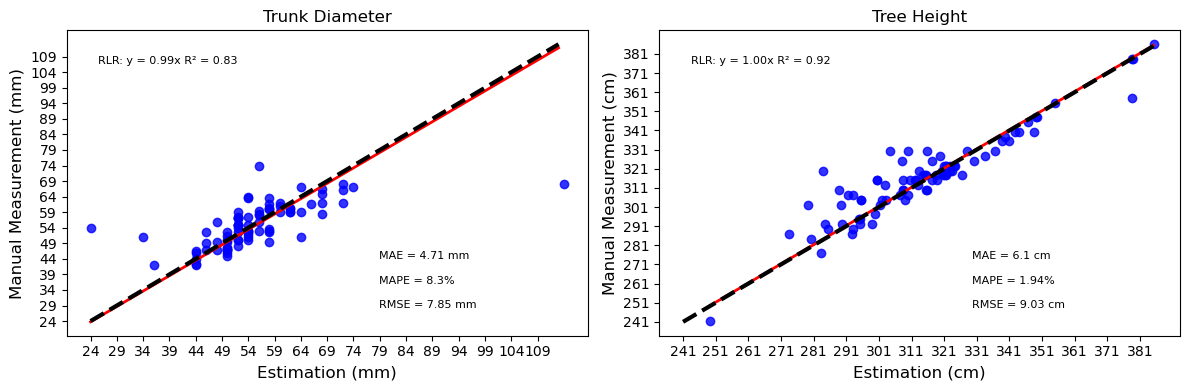

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ci = 95
ax = axes[0]
x_axis = 'Trunk Diameter' # 'Manual_Vertical_Crotch_Angle-Degree'
y_axis = 'Diameter'  # 'Vertical_Croth_Angle-Degree'

metrics = evaluation(measurement_df, x=x_axis, y=y_axis, fit_intercept=False)
lr_x, lr_y, lr_coef, lr_intercept, lr_score = metrics['LR']
ransac_lr_x, ransac_lr_y, rlr_coef, rlr_intercept, rlr_score = metrics['RLR']
sns.regplot(x=x_axis, y=y_axis, data=measurement_df, ci=ci, fit_reg=False, robust=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=ax)
# ax.plot(lr_x, lr_y, color="green", linewidth=2, label="Linear regressor")
ax.plot(ransac_lr_x, ransac_lr_y, color="red", linewidth=2, label="RANSAC regressor")
ax.text(0.06, 0.9, f'RLR: y = {rlr_coef[0]:.2f}x R\u00b2 = 0.83', **text_in_figure_para, transform=ax.transAxes)
# ax.text(0.06, 0.82, f'LR:   y = {lr_coef[0][0]:.2f}x R\u00b2 = {lr_score:.2f}', **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.26, f"MAE = {metrics['MAE']} mm", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.18, f"MAPE = {metrics['MAPE']}%", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.1, f"RMSE = {metrics['RMSE']} mm", **text_in_figure_para, transform=ax.transAxes)
ax.set_title('Trunk Diameter', **text_in_title_para)
ax.set_xlabel('Estimation (mm)', **text_in_title_para)
ax.set_ylabel('Manual Measurement (mm)', **text_in_title_para)

# plot 1:1 line
plot_yx_line(measurement_df, x_axis, y_axis, ax)

ax = axes[1]
x_axis = 'Tree Height Comp' # 'Manual_Vertical_Crotch_Angle-Degree'
y_axis = 'Manual Tree Height'  # 'Vertical_Croth_Angle-Degree'

metrics = evaluation(measurement_df, x=x_axis, y=y_axis, fit_intercept=False)
lr_x, lr_y, lr_coef, lr_intercept, lr_score = metrics['LR']
ransac_lr_x, ransac_lr_y, rlr_coef, rlr_intercept, rlr_score = metrics['RLR']
sns.regplot(x=x_axis, y=y_axis, data=measurement_df, ci=ci, fit_reg=False, robust=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=ax)
# ax.plot(lr_x, lr_y, color="green", linewidth=2, label="Linear regressor")
ax.plot(ransac_lr_x, ransac_lr_y, color="red", linewidth=2, label="RANSAC regressor")
ax.text(0.06, 0.9, f'RLR: y = {rlr_coef[0]:.2f}x R\u00b2 = 0.92', **text_in_figure_para, transform=ax.transAxes)
# ax.text(0.06, 0.82, f'LR:   y = {lr_coef[0][0]:.2f}x R\u00b2 = {lr_score:.2f}', **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.26, f"MAE = {metrics['MAE']} cm", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.18, f"MAPE = {metrics['MAPE']}%", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.1, f"RMSE = {metrics['RMSE']} cm", **text_in_figure_para, transform=ax.transAxes)
ax.set_title('Tree Height', **text_in_title_para)
ax.set_xlabel('Estimation (cm)', **text_in_title_para)
ax.set_ylabel('Manual Measurement (cm)', **text_in_title_para)

# plot 1:1 line
plot_yx_line(measurement_df, x_axis, y_axis, ax, x_interval=10, y_interval=10)

fig.tight_layout()
plt.savefig(str(data_folder / 'tree_trait_evaluation.png'), dpi=300)

d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


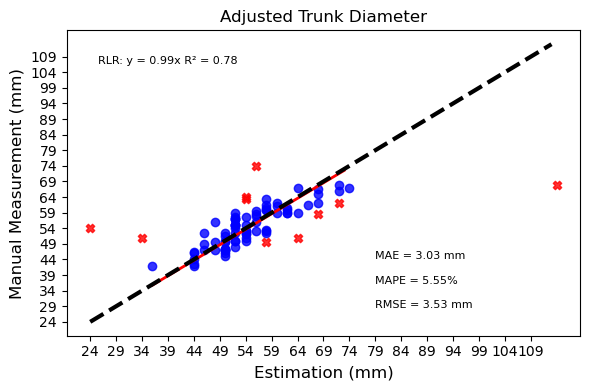

In [8]:
rest_measurement_df = measurement_df.loc[measurement_df['Difference > 8']==False, :]
removed_measurement_df = measurement_df.loc[measurement_df['Difference > 8']==True, :]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

x_axis = 'Trunk Diameter' # 'Manual_Vertical_Crotch_Angle-Degree'
y_axis = 'Diameter'  # 'Vertical_Croth_Angle-Degree'
metrics = evaluation(rest_measurement_df, x=x_axis, y=y_axis, fit_intercept=False)
lr_x, lr_y, lr_coef, lr_intercept, lr_score = metrics['LR']
ransac_lr_x, ransac_lr_y, rlr_coef, rlr_intercept, rlr_score = metrics['RLR']
sns.regplot(x=x_axis, y=y_axis, data=rest_measurement_df, ci=None, fit_reg=False, robust=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=ax)
sns.regplot(x=x_axis, y=y_axis, data=removed_measurement_df, ci=None, fit_reg=False, robust=False, marker="X", scatter_kws={"color": "red"}, ax=ax)

# ax.plot(lr_x, lr_y, color="green", linewidth=2, label="Linear regressor")
ax.plot(ransac_lr_x, ransac_lr_y, color="red", linewidth=2, label="Huber regressor")
ax.text(0.06, 0.9, f'RLR: y = {rlr_coef[0]:.2f}x R\u00b2 = {0.78:.2f}', **text_in_figure_para, transform=ax.transAxes)
# ax.text(0.06, 0.82, f'LR:   y = {lr_coef[0][0]:.2f}x+{lr_intercept[0]:.2f} R\u00b2 = {lr_score:.2f}', **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.26, f"MAE = {metrics['MAE']} mm", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.18, f"MAPE = {metrics['MAPE']}%", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.6, 0.1, f"RMSE = {metrics['RMSE']} mm", **text_in_figure_para, transform=ax.transAxes)
ax.set_title('Adjusted Trunk Diameter', **text_in_title_para)
ax.set_xlabel('Estimation (mm)', **text_in_title_para)
ax.set_ylabel('Manual Measurement (mm)', **text_in_title_para)

# plot 1:1 line
plot_yx_line(measurement_df, x_axis, y_axis, ax)

fig.tight_layout()
plt.savefig(str(data_folder / 'trunk_diameter_trait_evaluation_adjusted.png'), dpi=300)

In [9]:
rest_measurement_df.to_excel(str(data_folder / 'adjusted_all_tree_trait.xlsx'), index=False)

d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


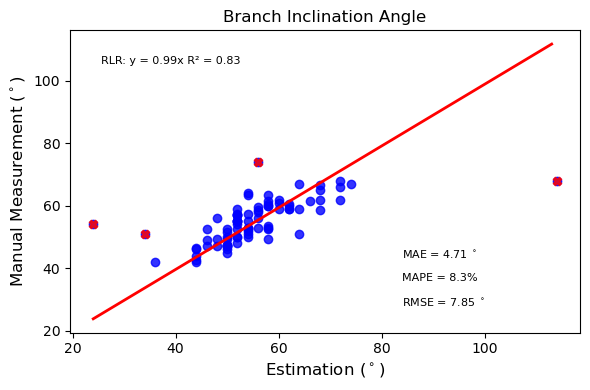

In [24]:
measurement_df = pd.read_excel(characterization_filepath, sheet_name='All')
measurement_df['Tree Height Comp'] = measurement_df['Tree Height'] * 1e2 + 60
measurement_df['Trunk Diameter'] = measurement_df['Trunk Radius'] * 1e3 * 2

removed_measurement_df = pd.read_excel(characterization_filepath, sheet_name='Removed')
removed_measurement_df['Tree Height Comp'] = removed_measurement_df['Tree Height'] * 1e2 + 60
removed_measurement_df['Trunk Diameter'] = removed_measurement_df['Trunk Radius'] * 1e3 * 2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

x_axis = 'Trunk Diameter' # 'Manual_Vertical_Crotch_Angle-Degree'
y_axis = 'Diameter'  # 'Vertical_Croth_Angle-Degree'
metrics = evaluation(measurement_df, x=x_axis, y=y_axis, fit_intercept=False)
lr_x, lr_y, lr_coef, lr_intercept, lr_score = metrics['LR']
ransac_lr_x, ransac_lr_y, rlr_coef, rlr_intercept, rlr_score = metrics['RLR']
sns.regplot(x=x_axis, y=y_axis, data=measurement_df, ci=None, fit_reg=False, robust=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=ax)
sns.regplot(x=x_axis, y=y_axis, data=removed_measurement_df, ci=None, fit_reg=False, robust=False, marker="X", scatter_kws={"color": "red"}, ax=ax)

# ax.plot(lr_x, lr_y, color="green", linewidth=2, label="Linear regressor")
ax.plot(ransac_lr_x, ransac_lr_y, color="red", linewidth=2, label="Huber regressor")
ax.text(0.06, 0.9, f'RLR: y = {rlr_coef[0]:.2f}x R\u00b2 = {0.83:.2f}', **text_in_figure_para, transform=ax.transAxes)
# ax.text(0.06, 0.82, f'LR:   y = {lr_coef[0][0]:.2f}x+{lr_intercept[0]:.2f} R\u00b2 = {lr_score:.2f}', **text_in_figure_para, transform=ax.transAxes)
ax.text(0.65, 0.26, f"MAE = {metrics['MAE']} $^\circ$", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.65, 0.18, f"MAPE = {metrics['MAPE']}%", **text_in_figure_para, transform=ax.transAxes)
ax.text(0.65, 0.1, f"RMSE = {metrics['RMSE']} $^\circ$", **text_in_figure_para, transform=ax.transAxes)
ax.set_title('Branch Inclination Angle', **text_in_title_para)
ax.set_xlabel('Estimation ($^\circ$)', **text_in_title_para)
ax.set_ylabel('Manual Measurement ($^\circ$)', **text_in_title_para)

fig.tight_layout()
plt.savefig(str(data_folder / 'trunk_diameter_trait_evaluation.png'), dpi=300)